In [9]:
import tensorflow as tf

from neuro.nn import activation, layer, losses, models, optimizer


In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


In [62]:
model = models.Sequential(
    layer.Flatten(),
    layer.Dense(28*28, 512), activation.ReLU(),
    layer.Dropout(0.25),
    layer.Dense(512, 128), activation.ReLU(),
    layer.Dense(128, 16), activation.ReLU(),
    layer.Dense(16, 10), activation.Softmax(),
)


In [61]:
loss = losses.SparseCategoricalCrossentropy()
optim = optimizer.SGD(lr=0.03)


In [13]:
update_rule = dict()
update_rule['Adam'] = []
update_rule['Adagrad'] = []
update_rule['Rmsprop'] = []
update_rule['SGD'] = []

In [60]:
update_rule['SGD'] = []

In [63]:
epochs = 100
for i in range(epochs):
    # Forward Propagation
    y_pred = model(x_train)

    # Calculation of Loss
    train_loss = loss(y_pred, y_train)
    print(f"Epoch: {i + 1}, Loss: {train_loss.numpy()}")
    update_rule['SGD'].append(train_loss.numpy())

    # Back Propagation + Optimizing
    optim(model, loss)


Epoch: 1, Loss: 2.3031156063079834
Epoch: 2, Loss: 2.3031115531921387
Epoch: 3, Loss: 2.303098440170288
Epoch: 4, Loss: 2.303105354309082
Epoch: 5, Loss: 2.3031020164489746
Epoch: 6, Loss: 2.3030946254730225
Epoch: 7, Loss: 2.303095817565918
Epoch: 8, Loss: 2.303100347518921
Epoch: 9, Loss: 2.3030917644500732
Epoch: 10, Loss: 2.3030924797058105
Epoch: 11, Loss: 2.303093671798706
Epoch: 12, Loss: 2.303100824356079
Epoch: 13, Loss: 2.3030922412872314
Epoch: 14, Loss: 2.303091287612915
Epoch: 15, Loss: 2.303086996078491
Epoch: 16, Loss: 2.3030776977539062
Epoch: 17, Loss: 2.3030848503112793
Epoch: 18, Loss: 2.3030786514282227
Epoch: 19, Loss: 2.3030765056610107
Epoch: 20, Loss: 2.3030734062194824
Epoch: 21, Loss: 2.303069591522217
Epoch: 22, Loss: 2.303093671798706
Epoch: 23, Loss: 2.3030738830566406
Epoch: 24, Loss: 2.3030691146850586
Epoch: 25, Loss: 2.3030714988708496
Epoch: 26, Loss: 2.3030622005462646
Epoch: 27, Loss: 2.303067445755005
Epoch: 28, Loss: 2.3030543327331543
Epoch: 29, L

KeyboardInterrupt: 

In [15]:
model.trainable = False

predictions = model(x_test)
predictions = tf.argmax(predictions, axis=1).numpy()

acc = sum(predictions == y_test) / len(y_test)
print(f"Test Accuracy: {acc * 100}%")


Test Accuracy: 92.77%


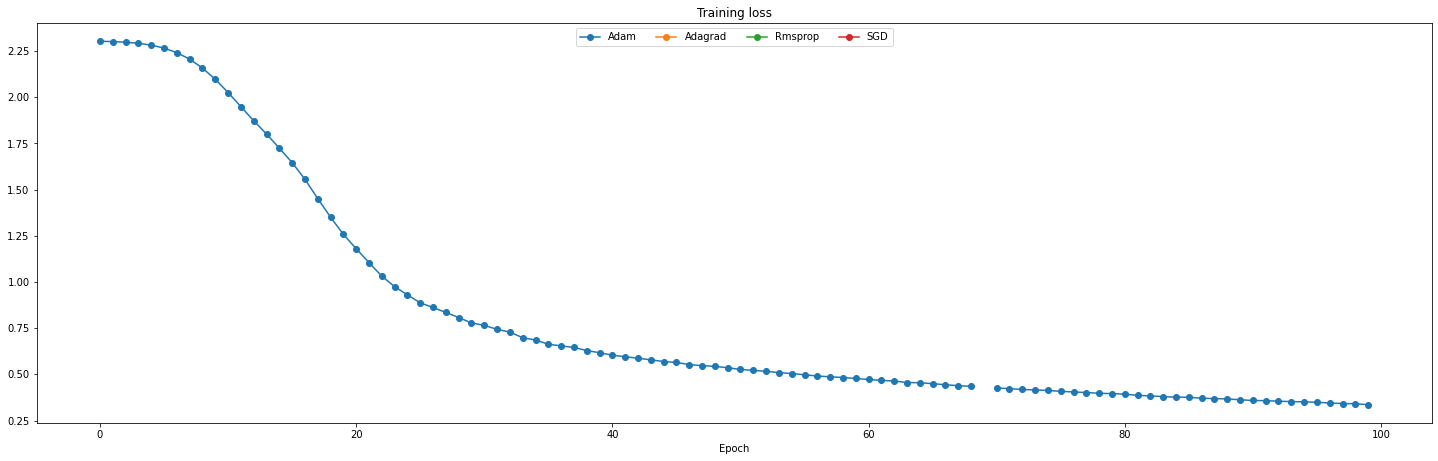

In [38]:
from matplotlib import pyplot as plt

# print(update_rule['Adam'])
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

for i in update_rule.keys():
    # for j,val in enumerate(update_rule[i]):
    plt.subplot(3, 1, 1)
    plt.plot(update_rule[i], '-o', label=i)


# for i in [1, 2, 3]:
plt.subplot(3, 1, 1)
plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(25, 25)
plt.show()